In [56]:
# We would like to find out what tv and movie anime to watch next and what not to watch, so we decided to take two CSVs files from Kaggle that rate animes on a range from 1-10
#1 being the least and 10 being the best. We will then load the dataframes into a database.

import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sqlalchemy import create_engine

ratings = "../ETLPROJECT/rating.csv"
anime = "../ETLPROJECT/anime.csv"
ratings_data = pd.read_csv(ratings)
anime_data = pd.read_csv(anime)



In [2]:
#merging csvs
anime_ratings = pd.merge(anime_data, ratings_data, how="inner", on = "anime_id")
anime_ratings

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1


In [3]:
anime_ratings.dropna(how='any',inplace=True)
anime_ratings

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1


In [4]:
#renaming columns
anime_renamed = anime_ratings.rename(columns = {'rating_x':'anime_ratings','rating_y':'rating_rates'})

In [5]:
#grouping by type
anime_group = anime_renamed.groupby("type", sort=False)["user_id"].count()
anime_group

type
Movie      1051909
TV         5283596
OVA         800307
Special     559347
Music        26500
ONA          91952
Name: user_id, dtype: int64

In [6]:
#removing -1 from both ratings. -1 mean the user did not rate the anime.
tv_df = anime_renamed.loc[anime_renamed["rating_rates"] >= 1]


tv_df1 = tv_df.loc[tv_df["anime_ratings"] >= 1]

tv_df1

,anime_id,name,genre,type,episodes,anime_ratings,members,user_id,rating_rates
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10
...,...,...,...,...,...,...,...,...,...
7813713,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,58483,1
7813716,5543,Under World,Hentai,OVA,1,4.28,183,49503,4
7813717,5543,Under World,Hentai,OVA,1,4.28,183,58483,1
7813720,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,49503,6


In [7]:
#combined both ratings from CSVs to create one 
tv_df1['anime_mean'] = tv_df1[['rating_rates','anime_ratings']].mean(axis=1)
tv_df1

,anime_id,name,genre,type,episodes,anime_ratings,members,user_id,rating_rates,anime_mean
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,7.185
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,9.685
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,9.685
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,9.685
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,9.685
...,...,...,...,...,...,...,...,...,...,...
7813713,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,58483,1,2.575
7813716,5543,Under World,Hentai,OVA,1,4.28,183,49503,4,4.140
7813717,5543,Under World,Hentai,OVA,1,4.28,183,58483,1,2.640
7813720,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,49503,6,5.440


In [8]:
# Filtering by  TV 
df = tv_df1.loc[tv_df1["type"] == 'TV']

df

,anime_id,name,genre,type,episodes,anime_ratings,members,user_id,rating_rates,anime_mean
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10,9.630
2200,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,10,10,9.630
2201,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,11,8,8.630
2202,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,12,9,9.130
2203,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,17,10,9.630
...,...,...,...,...,...,...,...,...,...,...
7689793,5234,Zettai Yareru Greece Shinwa,"Comedy, Ecchi",TV,13,6.22,284,67348,7,6.610
7689810,7808,Zukkoke Knight: Don De La Mancha,"Adventure, Comedy, Historical, Romance",TV,23,6.47,172,1822,6,6.235
7689811,7808,Zukkoke Knight: Don De La Mancha,"Adventure, Comedy, Historical, Romance",TV,23,6.47,172,25856,4,5.235
7689813,7808,Zukkoke Knight: Don De La Mancha,"Adventure, Comedy, Historical, Romance",TV,23,6.47,172,49127,6,6.235


In [9]:
#Top Ten TV Animes
df2 = df.groupby('name')['anime_mean','anime_id'].mean().reset_index().sort_values(by='anime_mean',ascending = False)
df2.head(10)

new_top_ten = df2[["name", "anime_mean", "anime_id"]].copy()
new_top_ten.head(10)

,name,anime_mean,anime_id
840,Gintama°,9.349747,28977
695,Fullmetal Alchemist: Brotherhood,9.291371,5114
838,Gintama&#039;,9.216276,9969
2554,Steins;Gate,9.215663,9253
1098,Hunter x Hunter (2011),9.182293,11061
931,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,9.160742,32935
839,Gintama&#039;: Enchousen,9.156129,15417
837,Gintama,9.138199,918
431,Clannad: After Story,9.112646,4181
437,Code Geass: Hangyaku no Lelouch R2,9.019919,2904


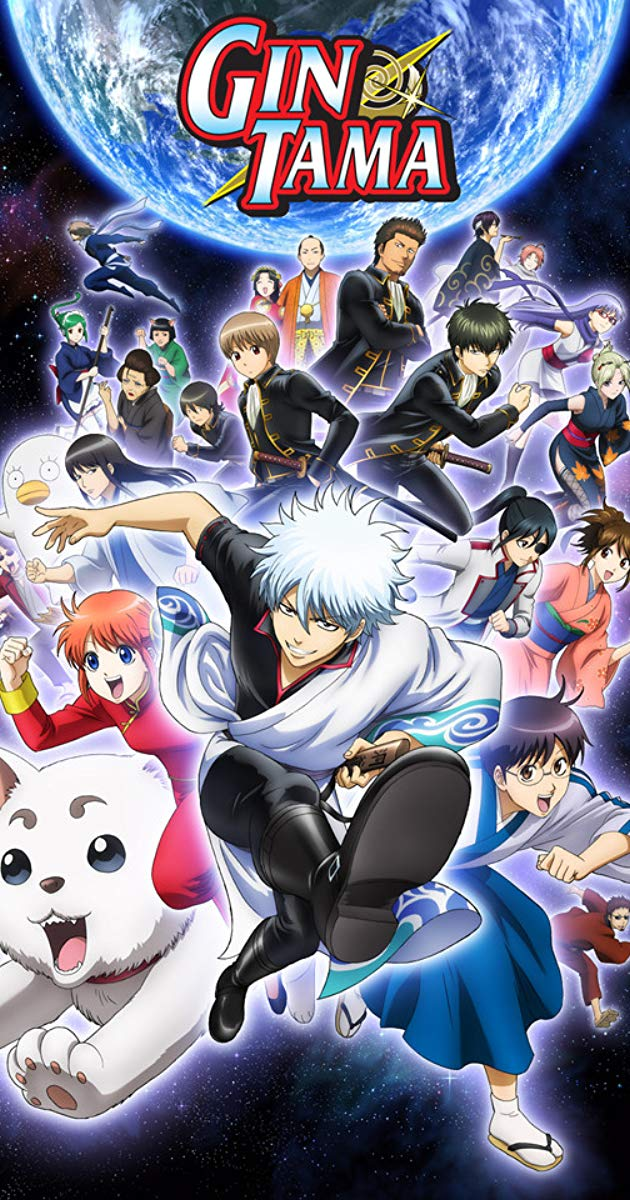

In [10]:
#Gintama is the top rated tv anime to watch by users. 
Image("../ETLPROJECT/images/gintama.png")

In [11]:
# The 10 least favorite tv anime series 
df3 = df.groupby('name')['anime_mean','anime_id'].mean().reset_index().sort_values(by='anime_mean',ascending = True)
df3.head(10)

new_last_ten = df3[["name", "anime_mean", "anime_id"]].copy()
new_last_ten.head(10)

,name,anime_mean,anime_id
331,Burutabu-chan,3.000000,32237
2843,Unko-san: Tsuiteru Hito ni Shika Mienai Yousei,3.125000,6658
882,Great Hunt,3.375000,30602
35,Agigongryong Doolie,3.410000,17088
1382,"Kinyoru, Abe Reiji: Heikinteki na Salaryman no...",3.570000,31071
18,AWOL,3.665000,12951
2868,Vampire Holmes,3.908985,28929
1068,Hitotsuboshi-ke no Ultra Baasan,3.940000,21549
2105,Pichiko Dakyuubu,4.000000,31464
2951,Yakyuubu Aruaru,4.000000,31177


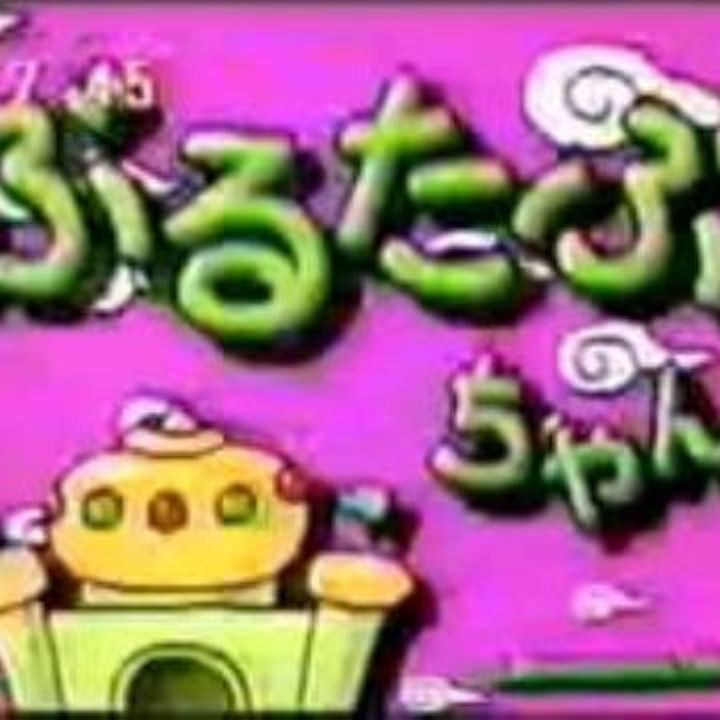

In [12]:
# Burutabu Chan is the least favorite anime rated by users
Image("../ETLPROJECT/images/burutabu_chan.png")

In [13]:
#filtering for anime movies

movie_df = tv_df1.loc[tv_df1["type"] == 'Movie']

movie_df

,anime_id,name,genre,type,episodes,anime_ratings,members,user_id,rating_rates,anime_mean
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,7.185
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,9.685
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,9.685
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,9.685
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,9.685
...,...,...,...,...,...,...,...,...,...,...
7789136,2755,Cleopatra,"Hentai, Historical",Movie,1,6.06,1709,66024,7,6.530
7789137,2755,Cleopatra,"Hentai, Historical",Movie,1,6.06,1709,69037,5,5.530
7789138,2755,Cleopatra,"Hentai, Historical",Movie,1,6.06,1709,70842,5,5.530
7813574,11141,Blue Seagull,"Action, Hentai",Movie,1,4.60,337,54819,2,3.300


In [14]:
#Top ten anime movies
top_movie = movie_df.groupby('name')['anime_mean','anime_id'].mean().reset_index().sort_values(by='anime_mean',ascending = False)

new_top_movie = top_movie[["name", "anime_mean", "anime_id"]].copy()
new_top_movie.head(10)

,name,anime_mean,anime_id
814,Kimi no Na wa.,9.398157,32281
546,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,9.145715,15335
851,Koe no Katachi,9.039706,28851
1355,Sen to Chihiro no Kamikakushi,8.926629,199
1176,Ookami Kodomo no Ame to Yuki,8.886129,12355
1455,Suzumiya Haruhi no Shoushitsu,8.858735,7311
867,Kono Sekai no Katasumi ni,8.820000,15227
1041,Mononoke Hime,8.808538,164
844,Kizumonogatari II: Nekketsu-hen,8.794825,31757
678,Howl no Ugoku Shiro,8.756092,431


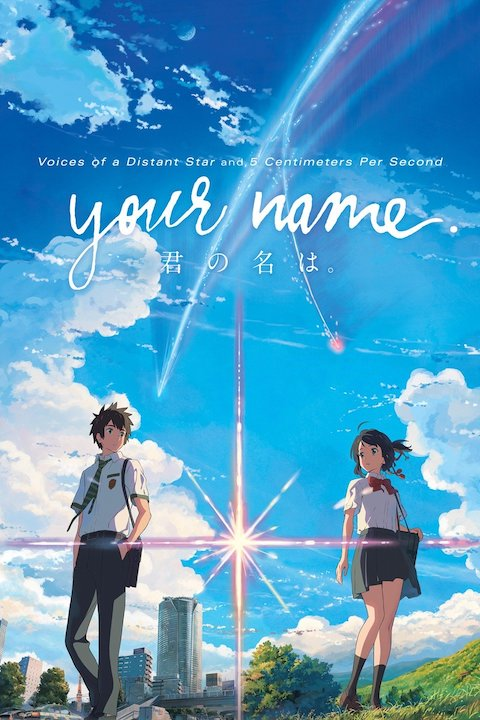

In [58]:
#looks like we need to watch the anime movie Kimi no Na wa!!!!

Image("../ETLPROJECT/images/Kimi ni no wa.png")

In [25]:
#what anime movies should we not watch ?!
last_movie = movie_df.groupby('name')['anime_mean','anime_id'].mean().reset_index().sort_values(by='anime_mean',ascending = True)

new_last_movie = last_movie[["name", "anime_mean", "anime_id"]].copy()
new_last_movie.head(10)

,name,anime_mean,anime_id
889,Kuripuri*Kuripura,2.100000,30395
1296,Roboteuwang Sseonsyakeu,2.245000,14781
470,Fetish Doll,2.382222,22169
1713,Yume 10 Yoru,2.440000,22173
563,Good-by Elvis and USA,2.455000,29617
1394,Shunga,2.495000,22181
43,Aki no Puzzle,2.563571,22179
14,4.Eyes,2.575000,30665
253,Crayon Angel,2.650000,29984
1199,Paper Film,2.665000,30403


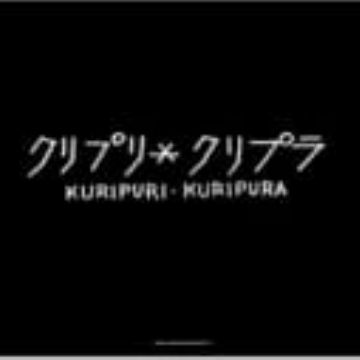

In [16]:
#Got it don't watch Kuripuri*Kuripura anime movie !

Image("../ETLPROJECT/images/kurupuri.png")

In [47]:
### Connecting  to local database
rds_connection_string = f":Ctrctrctr89!@localhost:5432/anime_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [48]:
engine.table_names()

['tv_top_anime', 'tv_last_anime', 'movie_top_anime', 'movie_last_anime']

In [49]:
### Using pandas to load csv converted DataFrame into database

new_top_ten.to_sql(name='tv_top_anime', con=engine, if_exists='append', index=False)
new_last_ten.to_sql(name='tv_last_anime', con=engine, if_exists='append', index=False)

In [50]:
### Using pandas to load csv converted DataFrame into database

new_top_movie.to_sql(name='movie_top_anime', con=engine, if_exists='append', index=False)

new_last_movie.to_sql(name='movie_last_anime', con=engine, if_exists='append', index=False)

In [51]:
#Confirming data has been added by querying the tv_top_anime table

pd.read_sql_query('select * from tv_top_anime', con=engine).head(300)

,anime_id,name,anime_mean
0,28977,Gintama°,9.349747
1,5114,Fullmetal Alchemist: Brotherhood,9.291371
2,9969,Gintama&#039;,9.216276
3,9253,Steins;Gate,9.215663
4,11061,Hunter x Hunter (2011),9.182293
...,...,...,...
295,114,Sakigake!! Cromartie Koukou,8.089383
296,7724,Shiki,8.084188
297,22777,Dragon Ball Kai (2014),8.083035
298,17549,Non Non Biyori,8.082811


In [52]:
#Confirming data has been added by querying the tv_last_anime table

pd.read_sql_query('select * from tv_last_anime', con=engine).head(300)

,anime_id,name,anime_mean
0,32237,Burutabu-chan,3.000000
1,6658,Unko-san: Tsuiteru Hito ni Shika Mienai Yousei,3.125000
2,30602,Great Hunt,3.375000
3,17088,Agigongryong Doolie,3.410000
4,31071,"Kinyoru, Abe Reiji: Heikinteki na Salaryman no...",3.570000
...,...,...,...
295,21523,Baku Tech! Bakugan Gachi,6.130000
296,9881,Chou Supercar Gattiger,6.133333
297,1743,Super Milk-chan,6.134030
298,2694,Hidamari no Ki,6.135000


In [53]:
#Confirming data has been added by querying the movie_top_anime table

pd.read_sql_query('select * from movie_top_anime', con=engine).head(300)

,anime_id,name,anime_mean
0,32281,Kimi no Na wa.,9.398157
1,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,9.145715
2,28851,Koe no Katachi,9.039706
3,199,Sen to Chihiro no Kamikakushi,8.926629
4,12355,Ookami Kodomo no Ame to Yuki,8.886129
...,...,...,...
295,617,Juubee Ninpuuchou,7.679317
296,1203,Nitaboh,7.678043
297,8632,Chuuzumou,7.677778
298,528,Pokemon: Mewtwo no Gyakushuu,7.677459


In [54]:
#Confirming data has been added by querying the movie_last_anime table

pd.read_sql_query('select * from movie_last_anime', con=engine).head(300)

,anime_id,name,anime_mean
0,30395,Kuripuri*Kuripura,2.100000
1,14781,Roboteuwang Sseonsyakeu,2.245000
2,22169,Fetish Doll,2.382222
3,22173,Yume 10 Yoru,2.440000
4,29617,Good-by Elvis and USA,2.455000
...,...,...,...
295,32889,Tu Xia Chuanqi,5.165000
296,10757,Kachikachi Yama,5.165000
297,6939,Eien no Hou,5.168333
298,6846,Kuma ni Kuwarenu Otoko,5.170000
